In [10]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [8]:
x = iris_df.drop('target',axis = 1)
y = iris_df['target']
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


n_x0_mean: -1.4684549872375404e-15
n_x0_sig: 1.0
n_x1_mean: -1.8237263551175904e-15
n_x1_sig: 1.0000000000000004
n_x2_mean: -1.6105635343895603e-15
n_x2_sig: 0.9999999999999999
{'n_x0_mean': -1.4684549872375404e-15, 'n_x1_mean': -1.8237263551175904e-15, 'n_x2_mean': -1.6105635343895603e-15}
{'n_x0_sig': 1.0, 'n_x1_sig': 1.0000000000000004, 'n_x2_sig': 0.9999999999999999}

(150, 4) equal to pca n_component
4


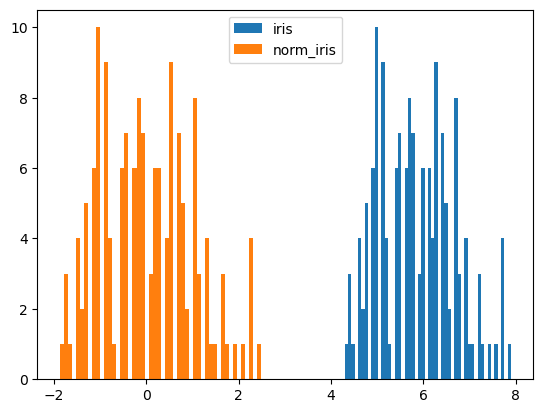

In [39]:
#使數據 means=0 sigma=1 才可pca

from sklearn.preprocessing import StandardScaler
x_norm = StandardScaler().fit_transform(x)

plt.hist(x['sepal length (cm)'],bins=50,label='iris')
plt.hist(x_norm[:,0],bins=50,label='norm_iris')
plt.legend()


means = {} 
sigmas = {}
for i in range(3):
    mean = x_norm[:, i].mean()
    means[f'n_x{i}_mean'] = mean
    sigma = x_norm[:, i].std()
    sigmas[f'n_x{i}_sig'] = sigma
    print(f'n_x{i}_mean: {mean}')
    print(f'n_x{i}_sig: {sigma}')
print(means)
print(sigmas)
print('')
print(x.shape,'equal to pca n_component')
print(x.shape[1])

[0.72962445 0.22850762 0.03668922 0.00517871] 取相對大的以達到降維度


<BarContainer object of 4 artists>

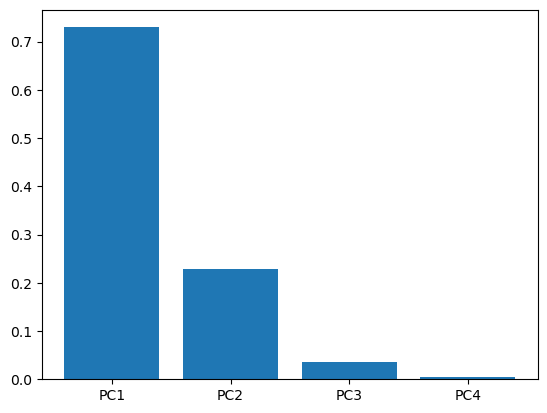

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=x.shape[1])
x_pca = pca.fit_transform(x_norm)
var_ration = pca.explained_variance_ratio_
print(var_ration,'取相對大的以達到降維度')

column_names = []
for i in range(1,5):
    column_names.append(f'PC{i}')

plt.bar(column_names,var_ration)


(150, 4)


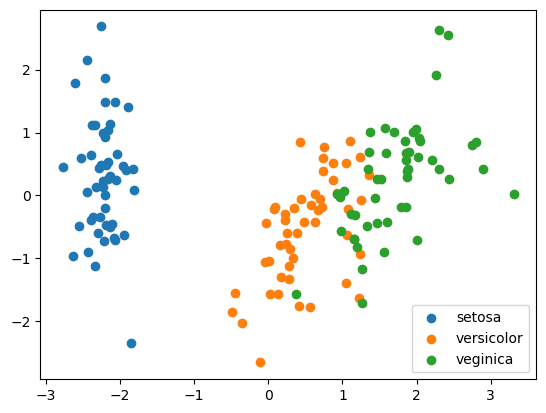

In [56]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_norm)
print(x.shape)

f_0 = plt.scatter(x_pca[:,0][y==0],x_pca[:,1][y==0],label='setosa')
f_1 = plt.scatter(x_pca[:,0][y==1],x_pca[:,1][y==1],label='versicolor')
f_2 = plt.scatter(x_pca[:,0][y==2],x_pca[:,1][y==2],label='veginica')
plt.legend()
plt.show()
